# 二項係数 $\binom{2n}{n}$ を $n$ で割った余りについて 〜 "エレガントな解答求む"より〜

## モジュール

In [2]:
import math
from decimal import *
getcontext().prec = (10**3)*5
from fractions import Fraction

import matplotlib.pyplot as plt
%matplotlib inline

from tqdm import tqdm

from functools import reduce

## 二項係数

### 二項係数を返す関数の2種の定義

In [3]:
def binom(n,k):
    return Decimal(math.factorial(n))/Decimal(math.factorial(k)*math.factorial(n-k))

def binom01(n,k):
    nume = reduce(lambda x,y: x*y, range(n-k+1, n+1))
    deno = reduce(lambda x,y: x*y, range(1, k+1))
    return Decimal(nume)/Decimal(deno)

def binom02(n,k):
    rtn = 1
    for i in range(k):
        rtn = Fraction(rtn.numerator * (n-i), rtn.denominator * (k-i))
#         rtn = rtn * Fraction(n-i, k-i)  # <-- だいぶ遅い
    if rtn.denominator == 1:
        return Decimal(rtn.numerator)
    else:
        return None

In [ ]:
num = 2000
print(binom02(2*num, num)==binom01(2*num, num))

### 2種の関数の速さ比べ

In [3]:
N = (10**3)*2

In [ ]:
Y = [binom(2*n, n) for n in tqdm(range(1,N))]

In [6]:
X = [binom01(2*n, n) for n in tqdm(range(1,N))]

100%|██████████| 1999/1999 [00:07<00:00, 253.09it/s]


In [5]:
Y = [binom02(2*n, n) for n in tqdm(range(1,N))]

100%|██████████| 1999/1999 [00:17<00:00, 116.87it/s]


In [7]:
X==Y

True

## グラフ描画

### $n = 1, 2, \dots, 2000$ において

In [13]:
N = (10**3)*2

X = range(1,N+1)
Y = [binom01(2*n,n)%n for n in tqdm(X)]

100%|██████████| 2000/2000 [00:08<00:00, 229.60it/s]


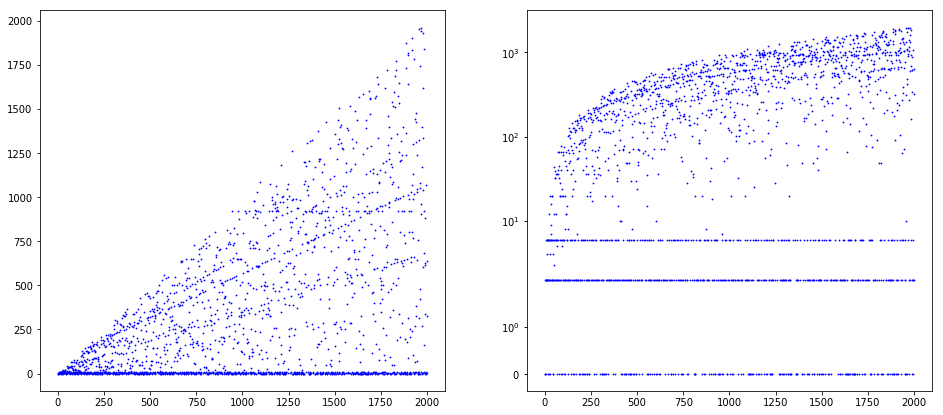

In [16]:
plt.figure(figsize = (16,7))

plt.subplot(121)
plt.plot(X, Y, 'b.', ms = 1.6)
plt.subplot(122)
plt.plot(X, Y, 'b.', ms = 1.6)
plt.yscale('symlog')

plt.show()

### `pickle` モジュール (データの永続化) の利用

#### pickle module をインポート

In [4]:
import pickle

#### データをピックル化

In [5]:
import os.path

N = 10**4
getcontext().prec = N

filename = 'data_'+str(N)+'.pickle'

if os.path.exists(filename):
    print('{} exists'.format(filename))
else:
    data = {
        'range': range(1,N+1),
        'values': [int(binom02(2*n,n)%n) for n in tqdm(range(1,N+1))]
        }
    with open(filename, 'wb') as f:
        # Pickle the 'data' dictionary using the highest protocol available.
        pickle.dump(data, f, pickle.HIGHEST_PROTOCOL)

data_10000.pickle exists


#### ピックル化されたデータを読み込み描画

In [6]:
# pickle 化されたデータを読み込みます。

filename = 'data_10000.pickle'
with open(filename, 'rb') as f:
    # The protocol version used is detected automatically, so we do not have to specify it.
    data = pickle.load(f)

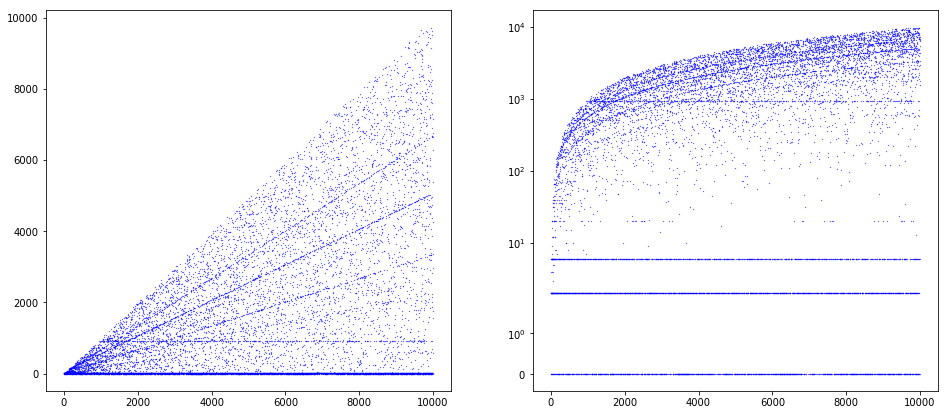

In [7]:
N = 10000 # 5000 # 3000 # 1000 #

X = range(1, N+1)
Y = data['values'][:N]

plt.figure(figsize = (16, 7))

plt.subplot(121)
plt.plot(X,Y, 'b.', ms = 0.5)
plt.subplot(122)
plt.plot(X,Y, 'b.', ms = 0.5)
plt.yscale('symlog')
    
plt.show()

## 余りとして現れる数値の頻度

In [9]:
N = 5000 # 2000 # 10000 # 3000

with open('data_10000.pickle', 'rb') as f:
    # The protocol version used is detected automatically, so we do not have to specify it.
    data = pickle.load(f)

In [12]:
X = data['range']
cnt = [data['values'].count(n) for n in X]

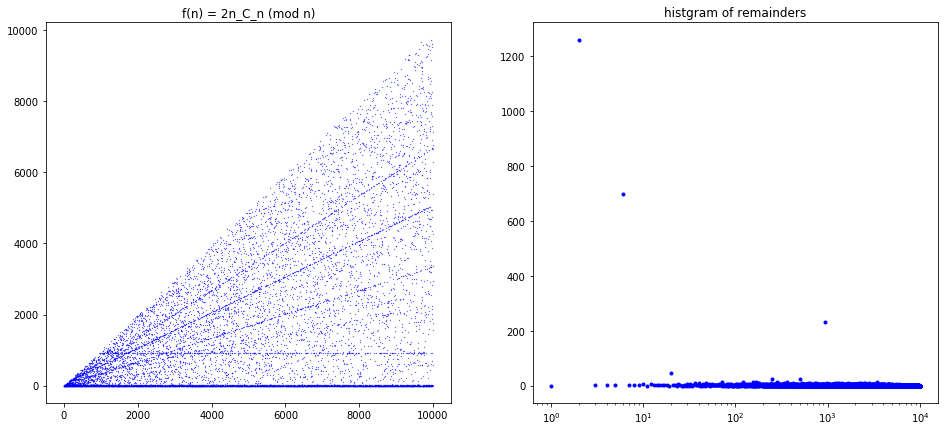

In [13]:
plt.figure(figsize = (16,7))

plt.subplot(121)
plt.plot(X, data['values'], 'b.', ms = 0.5)
plt.title('f(n) = 2n_C_n (mod n)')
plt.subplot(122)
# plt.plot(X, cnt, lw = 0.5)
plt.plot(X, cnt, 'b.')
plt.title('histgram of remainders')
plt.xscale('log')
# plt.yscale('log')

plt.show()

In [29]:
vlist = {num: data['values'].count(num) for num in X}.items()
sorted(vlist, key=lambda vlist: vlist[1], reverse=True)[0:10]

[(2, 693),
 (6, 390),
 (924, 114),
 (20, 30),
 (504, 20),
 (252, 18),
 (72, 12),
 (36, 11),
 (156, 11),
 (120, 10)]